In [1]:
from Database import Database
import sys
# import multiprocessing as mp
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import numpy as np

In [2]:
def get_project_ids(db):
    db.cursor.execute("""SELECT *
                            FROM project""")
    projects = db.cursor.fetchall()
    dict_project = dict()
    for proj in projects:
        dict_project[proj['ID']] = proj['project_ID']
    return dict_project

In [3]:
 path_db = 'D:/Hanze_Groningen/STAGE/db_laatste_copy.db' #'D:/Hanze_Groningen/STAGE/DATAB/copydatabase_C.db'
# Database connection
db = Database(path_db)
dict_project = get_project_ids(db)
print(len(dict_project))

43


In [4]:
df = pd.read_sql('''SELECT project.cancer, sum_dosage_GT.donor_project_ID, 
                            sum_dosage_GT.donor_ID, sum_dosage_GT.snp_ID, 
                            snp.chr, snp.pos_start, snp.pos_end 
                    FROM project, sum_dosage_GT, snp 
                    WHERE sum_dosage_GT.snp_ID=snp.ID AND 
                              sum_dosage_GT.donor_project_ID = project.ID AND 
                              (sum_dosage_GT.GT2 = 1 OR sum_dosage_GT.GT2 = 2) AND 
                              sum_dosage_GT.total_read_count_sum >= 33;''', db.mydb_connection)

In [5]:
print('HEAD')
print(df.head())
print(len(set(df['cancer'])))
print(set(df['cancer']))
print(len(set(df['donor_project_ID'])))
print(set(df['donor_project_ID']))
print(len(set(df['donor_ID'])))
print(len(set(df['snp_ID'])))
print(len(df))
print(set(df['chr']))

HEAD
          cancer  donor_project_ID  donor_ID  snp_ID chr  pos_start    pos_end
0  Head and neck                 1         1      41  11  101465614  101465614
1  Head and neck                 1         1     151  11  103127113  103127113
2  Head and neck                 1         1     197   8   82046917   82046917
3  Head and neck                 1         1     216  11  107789760  107789760
4  Head and neck                 1         1     241  14   48732779   48732779
15
{'Blood', 'Head and neck', 'Bladder', 'Cervix', 'Mesenchymal', 'Kidney', 'Stomach', 'Ovary', 'Gall Bladder', 'Liver', 'Uterus', 'Colorectal', 'Breast', 'Bone', 'Brain'}
40
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43}
2169
5651989
5855204
{'11', '1', '21', '7', '5', '8', '4', '16', 'X', 'Y', '9', '2', '17', 'MT', '3', '13', '22', '18', '14', '15', '12', '10', '19', '6', '20'}


In [6]:
df_fil = df.loc[df['chr'] != 'MT']
df_fil['chr'] ='chr' + df_fil['chr'].astype(str)

<ipython-input-6-5a2c1653c4d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fil['chr'] ='chr' + df_fil['chr'].astype(str)


In [7]:
breast_cancer = df_fil.loc[df_fil['cancer'] == 'Breast']
breast_cancer1 = breast_cancer[['chr', 'pos_start', 'pos_end']]
breast_cancer1.sort_values(by=['chr', 'pos_start'], inplace=True)

<ipython-input-7-bb9243d632d2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  breast_cancer1.sort_values(by=['chr', 'pos_start'], inplace=True)


In [8]:
nonbreast_cancer = df_fil.loc[df_fil['cancer'] != 'Breast']
nonbreast_cancer1 = nonbreast_cancer[['chr', 'pos_start', 'pos_end']]
nonbreast_cancer1.sort_values(by=['chr', 'pos_start'], inplace=True)

<ipython-input-8-4f38133a77e2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonbreast_cancer1.sort_values(by=['chr', 'pos_start'], inplace=True)


In [9]:
breast_cancer['snp'] = breast_cancer['chr'] + '_' + breast_cancer['pos_start'].map(str) + '_' + breast_cancer['pos_end'].map(str)
print(len(list(set(breast_cancer['donor_ID']))))
num_donor_breast = len(list(set(breast_cancer['donor_ID'])))
breast_cancer

285


<ipython-input-9-8adcad4a8fd6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  breast_cancer['snp'] = breast_cancer['chr'] + '_' + breast_cancer['pos_start'].map(str) + '_' + breast_cancer['pos_end'].map(str)


,cancer,donor_project_ID,donor_ID,snp_ID,chr,pos_start,pos_end,snp
776755,Breast,25,1305,1979425,chr9,104350785,104350785,chr9_104350785_104350785
776756,Breast,25,1305,3656805,chr1,25646616,25646616,chr1_25646616_25646616
776757,Breast,25,1305,3656808,chr1,25646640,25646640,chr1_25646640_25646640
776758,Breast,25,1305,3656812,chr1,29155652,29155652,chr1_29155652_29155652
776759,Breast,25,1305,3656831,chr1,61862224,61862224,chr1_61862224_61862224
...,...,...,...,...,...,...,...,...
993973,Breast,28,2057,8740839,chr8,48761994,48761994,chr8_48761994_48761994
993974,Breast,28,2057,8740853,chr2,54494456,54494456,chr2_54494456_54494456
993975,Breast,28,2057,8740862,chr22,46712078,46712078,chr22_46712078_46712078
993976,Breast,28,2057,8740870,chr17,33772618,33772618,chr17_33772618_33772618


In [10]:
nonbreast_cancer['snp'] = nonbreast_cancer['chr'] + '_' + nonbreast_cancer['pos_start'].map(str) + '_' + nonbreast_cancer['pos_end'].map(str)
print(len(list(set(nonbreast_cancer['donor_ID']))))
num_donor_nonbreast = len(list(set(nonbreast_cancer['donor_ID'])))
nonbreast_cancer

<ipython-input-10-a350e5104874>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonbreast_cancer['snp'] = nonbreast_cancer['chr'] + '_' + nonbreast_cancer['pos_start'].map(str) + '_' + nonbreast_cancer['pos_end'].map(str)


1884


,cancer,donor_project_ID,donor_ID,snp_ID,chr,pos_start,pos_end,snp
0,Head and neck,1,1,41,chr11,101465614,101465614,chr11_101465614_101465614
1,Head and neck,1,1,151,chr11,103127113,103127113,chr11_103127113_103127113
2,Head and neck,1,1,197,chr8,82046917,82046917,chr8_82046917_82046917
3,Head and neck,1,1,216,chr11,107789760,107789760,chr11_107789760_107789760
4,Head and neck,1,1,241,chr14,48732779,48732779,chr14_48732779_48732779
...,...,...,...,...,...,...,...,...
5855199,Mesenchymal,43,2996,21812208,chr7,102949431,102949431,chr7_102949431_102949431
5855200,Mesenchymal,43,2996,21812224,chr11,121028837,121028837,chr11_121028837_121028837
5855201,Mesenchymal,43,2996,21812247,chr1,155658167,155658167,chr1_155658167_155658167
5855202,Mesenchymal,43,2996,21812248,chr17,46607840,46607840,chr17_46607840_46607840


In [11]:
breast_dict = dict(Counter(list(breast_cancer['snp'])))
nonbreast_dict = dict(Counter(list(nonbreast_cancer['snp'])))


In [12]:
breast_snp_count_df = pd.DataFrame([breast_dict.keys(), breast_dict.values()]).T
breast_snp_count_df.columns= ['snp', 'counts']

max_breast = breast_snp_count_df['counts'].max()
breast_snp_count_df['counts'].max()

22

In [13]:
breast_snp_count_df

,snp,counts
0,chr9_104350785_104350785,1
1,chr1_25646616_25646616,1
2,chr1_25646640_25646640,1
3,chr1_29155652_29155652,1
4,chr1_61862224_61862224,1
...,...,...
217123,chr8_48761994_48761994,1
217124,chr2_54494456_54494456,1
217125,chr22_46712078_46712078,1
217126,chr17_33772618_33772618,1


In [14]:
nonbreast_snp_count_df = pd.DataFrame([nonbreast_dict.keys(), nonbreast_dict.values()]).T
nonbreast_snp_count_df.columns= ['snp', 'counts']

max_nonbreast = nonbreast_snp_count_df['counts'].max()
nonbreast_snp_count_df['counts'].max()

39

In [15]:
nonbreast_snp_count_df

,snp,counts
0,chr11_101465614_101465614,1
1,chr11_103127113_103127113,1
2,chr8_82046917_82046917,1
3,chr11_107789760_107789760,1
4,chr14_48732779_48732779,1
...,...,...
4677613,chr7_102949431_102949431,1
4677614,chr11_121028837_121028837,1
4677615,chr1_155658167_155658167,1
4677616,chr17_46607840_46607840,1


In [16]:
breast_snp_count_df[['chr', 'pos_start', 'pos_end']] = breast_snp_count_df['snp'].str.split('_', expand=True)
nonbreast_snp_count_df[['chr', 'pos_start', 'pos_end']] = nonbreast_snp_count_df['snp'].str.split('_', expand=True)

In [17]:
breast_snp_count_df

,snp,counts,chr,pos_start,pos_end
0,chr9_104350785_104350785,1,chr9,104350785,104350785
1,chr1_25646616_25646616,1,chr1,25646616,25646616
2,chr1_25646640_25646640,1,chr1,25646640,25646640
3,chr1_29155652_29155652,1,chr1,29155652,29155652
4,chr1_61862224_61862224,1,chr1,61862224,61862224
...,...,...,...,...,...
217123,chr8_48761994_48761994,1,chr8,48761994,48761994
217124,chr2_54494456_54494456,1,chr2,54494456,54494456
217125,chr22_46712078_46712078,1,chr22,46712078,46712078
217126,chr17_33772618_33772618,1,chr17,33772618,33772618


In [18]:
nonbreast_snp_count_df

,snp,counts,chr,pos_start,pos_end
0,chr11_101465614_101465614,1,chr11,101465614,101465614
1,chr11_103127113_103127113,1,chr11,103127113,103127113
2,chr8_82046917_82046917,1,chr8,82046917,82046917
3,chr11_107789760_107789760,1,chr11,107789760,107789760
4,chr14_48732779_48732779,1,chr14,48732779,48732779
...,...,...,...,...,...
4677613,chr7_102949431_102949431,1,chr7,102949431,102949431
4677614,chr11_121028837_121028837,1,chr11,121028837,121028837
4677615,chr1_155658167_155658167,1,chr1,155658167,155658167
4677616,chr17_46607840_46607840,1,chr17,46607840,46607840


In [19]:
breast_snp_count_df.drop('snp', axis=1, inplace=True)
nonbreast_snp_count_df.drop('snp', axis=1, inplace=True)

In [20]:
sort_breast_snp_count_df = breast_snp_count_df.sort_values('counts', ascending=False)
sort_nonbreast_snp_count_df = nonbreast_snp_count_df.sort_values('counts', ascending=False)

In [21]:
sort_breast_snp_count_df.rename(columns={'counts': 'counts_breast'}, inplace=True)
sort_nonbreast_snp_count_df.rename(columns={'counts': 'counts_nonbreast'}, inplace=True)

In [22]:
sort_breast_snp_count_df

,counts_breast,chr,pos_start,pos_end
522,22,chr3,178952085,178952085
6952,6,chr3,178936091,178936091
43780,4,chr14,105246551,105246551
12552,3,chr10,8111433,8111434
85707,2,chr21,31172543,31172543
...,...,...,...,...
72393,1,chr6,101793167,101793167
72394,1,chr3,23319452,23319452
72395,1,chr5,24034565,24034565
72396,1,chr3,196110911,196110911


In [23]:
sort_nonbreast_snp_count_df

,counts_nonbreast,chr,pos_start,pos_end
787050,39,chr16,23961453,23961453
771541,32,chr4,119972341,119972341
6720,28,chr12,25398284,25398284
781492,28,chr5,124474355,124474355
817636,26,chr4,14673408,14673408
...,...,...,...,...
1629711,1,chr21,30025421,30025421
1629712,1,chr22,23674453,23674453
1629713,1,chr20,46011295,46011295
1629714,1,chr2,4199709,4199709


In [24]:
sort_breast_snp_count_df.to_csv(f"D:/Hanze_Groningen/STAGE/R/breast_snp_count_df_maxcount_{max_breast}_donor_{num_donor_breast}_GT12_totalread_33.tsv", sep='\t', encoding='utf-8', index=False)
sort_nonbreast_snp_count_df.to_csv(f"D:/Hanze_Groningen/STAGE/R/nonbreast_snp_count_df_maxcount_{max_nonbreast}_donor_{num_donor_nonbreast}_GT12_totalread_33.tsv", sep='\t', encoding='utf-8', index=False)

In [25]:
# merge_b_nb = pd.concat([sort_breast_snp_count_df, sort_nonbreast_snp_count_df], ignore_index=True, sort=False)

#https://stackoverflow.com/questions/53645882/pandas-merging-101
merge_b_nb = sort_breast_snp_count_df.merge(sort_nonbreast_snp_count_df, on=['chr', 'pos_start', 'pos_end'], how='outer')

In [26]:
merge_b_nb[(merge_b_nb['counts_breast']>=1) & (merge_b_nb['counts_nonbreast']>=1)]

,counts_breast,chr,pos_start,pos_end,counts_nonbreast
0,22,chr3,178952085,178952085,7
1,6,chr3,178936091,178936091,6
2,4,chr14,105246551,105246551,3
7,2,chr3,178936082,178936082,2
9,2,chr2,30161804,30161804,1
...,...,...,...,...,...
215577,1,chr11,129489147,129489147,1
215655,1,chr4,42282418,42282418,1
215965,1,chr4,25065454,25065454,1
215985,1,chr3,27961891,27961891,1


In [27]:
merge_b_nb

,counts_breast,chr,pos_start,pos_end,counts_nonbreast
0,22,chr3,178952085,178952085,7
1,6,chr3,178936091,178936091,6
2,4,chr14,105246551,105246551,3
3,3,chr10,8111433,8111434,NaN
4,2,chr21,31172543,31172543,NaN
...,...,...,...,...,...
4893919,NaN,chr21,30025421,30025421,1
4893920,NaN,chr22,23674453,23674453,1
4893921,NaN,chr20,46011295,46011295,1
4893922,NaN,chr2,4199709,4199709,1


In [28]:
merge_b_nb.to_csv(f"D:/Hanze_Groningen/STAGE/R/ALL_nan_df_BREAST_maxcount_{max_breast}_donor_{num_donor_breast}_NONBREAST_maxcount_{max_nonbreast}_donor_{num_donor_nonbreast}_BOTH_GT12_totalread_33.tsv", sep='\t', encoding='utf-8', index=False)

In [29]:
merge_b_nb_0 = merge_b_nb.fillna(0)
merge_b_nb_0.to_csv(f"D:/Hanze_Groningen/STAGE/R/ALL_0_df_BREAST_maxcount_{max_breast}_donor_{num_donor_breast}_NONBREAST_maxcount_{max_nonbreast}_donor_{num_donor_nonbreast}_BOTH_GT12_totalread_33.tsv", sep='\t', encoding='utf-8', index=False)

In [ ]:
# ax = sns.boxplot(data=sort_breast_snp_count_df[['counts_breast']]).set(ylabel='#snps')
# plt.show()
# plt.clf()
# ax = sns.displot(sort_breast_snp_count_df[['counts_breast']])
# plt.show()
# plt.clf()

In [ ]:
# filter_breast = sort_breast_snp_count_df[(sort_breast_snp_count_df['counts_breast']>1)]

# ax = sns.boxplot(data=filter_breast[['counts_breast']]).set(ylabel='#snps')
# plt.show()
# plt.clf()
# ax = sns.displot(filter_breast[['counts_breast']])
# plt.show()
# plt.clf()

In [ ]:
# ax = sns.boxplot(data=sort_nonbreast_snp_count_df[['counts_nonbreast']]).set(ylabel='#snps')
# plt.show()
# plt.clf()
# ax = sns.displot(sort_nonbreast_snp_count_df[['counts_nonbreast']])
# plt.show()
# plt.clf()

In [ ]:
# filter_nonbreast = sort_nonbreast_snp_count_df[(sort_nonbreast_snp_count_df['counts_nonbreast']>1)]

# ax = sns.boxplot(data=filter_nonbreast[['counts_nonbreast']]).set(ylabel='#snps')
# plt.show()
# plt.clf()
# ax = sns.displot(filter_nonbreast[['counts_nonbreast']])
# plt.show()
# plt.clf()

In [30]:
merge_b_nb_0

,counts_breast,chr,pos_start,pos_end,counts_nonbreast
0,22,chr3,178952085,178952085,7
1,6,chr3,178936091,178936091,6
2,4,chr14,105246551,105246551,3
3,3,chr10,8111433,8111434,0
4,2,chr21,31172543,31172543,0
...,...,...,...,...,...
4893919,0,chr21,30025421,30025421,1
4893920,0,chr22,23674453,23674453,1
4893921,0,chr20,46011295,46011295,1
4893922,0,chr2,4199709,4199709,1


In [31]:
# https://www.geeksforgeeks.org/python-pearsons-chi-square-test/
from scipy.stats import chi2_contingency
  
# defining the table
#
#       donor   |  snp
#  b  | 285     | 22
#  nb | 1885    | 7
data = [[285, 22], [1885, 7]]
stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 4.8416908048252445e-21
Dependent (reject H0)


In [ ]:
# f = open("D:/Hanze_Groningen/STAGE/R/chi_square.tsv", 'w')
# for index, row in merge_b_nb_0.iterrows():
#     data = [[285, row['counts_breast']], [1885, row['counts_nonbreast']]]
#     stat, p, dof, expected = chi2_contingency(data)
#     f.write(f"{row['chr']}\t{row['pos_start']}\t{row['pos_end']}\t{row['counts_breast']}\t{row['counts_nonbreast']}\t{stat}\t{p}\t{dof}\t{expected}\n")
    
# f.close()

In [ ]:
# fold_change = merge_b_nb_0.copy()
# fold_change['filter_b'] = fold_change['counts_breast'] / 285
# fold_change['filter_nb'] = fold_change['counts_nonbreast'] / 1885
# fold_change['FC'] = fold_change['filter_b'] / folc_change['filter_nb']

In [ ]:
#tsjerk

# X^2
# f = n / n.sum()
# E1 = S.sum(axis=1)[:,None]*f
# C = (n-s)
# E2 = C.sum(axis=1)[:,None]*f
# D1 = ((E1-S)**2/E1).sum(axis=1)
# D2 = ((E2-C)/E2).sum(axis=1)
# X2 = D1 + D2

# log_fc = np.diff(np.log(S), axis = 1) - (log n).sum()

In [32]:
merge_b_nb_0['counts_nonbreast_plus'] = merge_b_nb_0['counts_nonbreast'] + (1/1885)
merge_b_nb_0['counts_breast_plus'] = merge_b_nb_0['counts_breast'] + (1/285)

In [34]:
n = np.array([285, 1885])
S = merge_b_nb_0[['counts_breast_plus', 'counts_nonbreast_plus']].to_numpy() #+1
S

array([[2.20035088e+01, 7.00053050e+00],
       [6.00350877e+00, 6.00053050e+00],
       [4.00350877e+00, 3.00053050e+00],
       ...,
       [3.50877193e-03, 1.00053050e+00],
       [3.50877193e-03, 1.00053050e+00],
       [3.50877193e-03, 1.00053050e+00]])

In [35]:
f = n / n.sum()
f

array([0.13133641, 0.86866359])

In [36]:
E1 = S.sum(axis=1)[:,None]*f
E1

array([[ 3.80928626, 25.19475301],
       [ 1.57656737, 10.42747191],
       [ 0.91988534,  6.08415393],
       ...,
       [ 0.13186691,  0.87217237],
       [ 0.13186691,  0.87217237],
       [ 0.13186691,  0.87217237]])

In [37]:
C = (n-S)
C

array([[ 262.99649123, 1877.9994695 ],
       [ 278.99649123, 1878.9994695 ],
       [ 280.99649123, 1881.9994695 ],
       ...,
       [ 284.99649123, 1883.9994695 ],
       [ 284.99649123, 1883.9994695 ],
       [ 284.99649123, 1883.9994695 ]])

In [38]:
E2 = C.sum(axis=1)[:,None]*f
E2

array([[ 281.19071374, 1859.80524699],
       [ 283.42343263, 1874.57252809],
       [ 284.08011466, 1878.91584607],
       ...,
       [ 284.86813309, 1884.12782763],
       [ 284.86813309, 1884.12782763],
       [ 284.86813309, 1884.12782763]])

In [39]:
D1 = ((E1-S)**2/E1).sum(axis=1)
D1

array([100.03955976,  14.31012384,  11.89973675, ...,   0.14383327,
         0.14383327,   0.14383327])

In [40]:
D2 = ((E2-C)/E2).sum(axis=1)
D2

array([ 0.05492134,  0.01325796,  0.0092136 , ..., -0.00038246,
       -0.00038246, -0.00038246])

In [41]:
X2 = D1 + D2
X2

array([100.0944811 ,  14.3233818 ,  11.90895035, ...,   0.14345081,
         0.14345081,   0.14345081])

In [ ]:
# chi2.sf(100.07565261,1)
# chi2.sf(0.1508023,1)

In [42]:
# https://stackoverflow.com/questions/11725115/p-value-from-chi-sq-test-statistic-in-python
from scipy.stats.distributions import chi2
p_value_X2 = chi2.sf(X2,1)

In [ ]:
# np.log(285)+np.log(1885) == (np.log(n)).sum()
# np.log(22)-np.log(7)-np.log(285)-np.log(1885)

log2 FC = log2 a/n1 / b/n2 = 
log2 22/285 / 7/1885 = 
log2 22/285 - log2 7/1885 = 
log2 22 - log2 285 - log2 7 + log2 1885 =
log2 22 - log2 7 - (log2 285 - log2 1885)


In [ ]:
# logS = np.log2(S)
# logS

# log_fc = np.diff(np.log2(S), axis = 1) - (np.log2(n)).sum()

In [ ]:
# np.log(7)-np.log(22) = np.diff(logS)

In [43]:
constant = np.log(n[0]) - np.log(n[1])
log2_fc = (np.log(S[:, 0]) - np.log(S[:, 1]) - constant) / np.log(2)
log2_fc
#1
#-1 borst kanker is helft voorkomen van nb

array([ 4.37772814,  2.72624658,  3.14157807, ..., -5.43005256,
       -5.43005256, -5.43005256])

In [44]:
log10_p_value = -np.log10(p_value_X2)
log10_p_value

array([22.83774088,  3.81264599,  3.2528612 , ...,  0.15188835,
        0.15188835,  0.15188835])

In [45]:
merge_b_nb_0['X2'] = X2
merge_b_nb_0['p_value_X2'] = p_value_X2
merge_b_nb_0['log10_p_value'] = log10_p_value # -log10(p-value)
merge_b_nb_0['log2_fc'] = log2_fc # log2(FC)

In [46]:
merge_b_nb_0

,counts_breast,chr,pos_start,pos_end,counts_nonbreast,counts_nonbreast_plus,counts_breast_plus,X2,p_value_X2,log10_p_value,log2_fc
0,22,chr3,178952085,178952085,7,7.000531,22.003509,100.094481,1.452978e-23,22.837741,4.377728
1,6,chr3,178936091,178936091,6,6.000531,6.003509,14.323382,1.539409e-04,3.812646,2.726247
2,4,chr14,105246551,105246551,3,3.000531,4.003509,11.908950,5.586487e-04,3.252861,3.141578
3,3,chr10,8111433,8111434,0,0.000531,3.003509,19.868524,8.295496e-06,5.081158,15.192528
4,2,chr21,31172543,31172543,0,0.000531,2.003509,13.251897,2.723042e-04,3.564946,14.608408
...,...,...,...,...,...,...,...,...,...,...,...
4893919,0,chr21,30025421,30025421,1,1.000531,0.003509,0.143451,7.048743e-01,0.151888,-5.430053
4893920,0,chr22,23674453,23674453,1,1.000531,0.003509,0.143451,7.048743e-01,0.151888,-5.430053
4893921,0,chr20,46011295,46011295,1,1.000531,0.003509,0.143451,7.048743e-01,0.151888,-5.430053
4893922,0,chr2,4199709,4199709,1,1.000531,0.003509,0.143451,7.048743e-01,0.151888,-5.430053


In [50]:
merge_b_nb_0.to_csv(f"D:/Hanze_Groningen/STAGE/R/p_valueANDfc_df_BREAST_maxcount_{max_breast}_donor_{num_donor_breast}_NONBREAST_maxcount_{max_nonbreast}_donor_{num_donor_nonbreast}_BOTH_GT12_totalread_33.tsv", sep='\t', encoding='utf-8', index=False)

In [47]:
from bioinfokit import analys, visuz

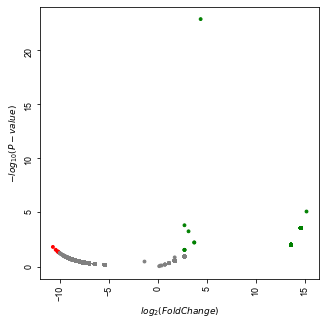

In [48]:
#plot and open . This will not save the image
visuz.GeneExpression.volcano(df=merge_b_nb_0,lfc='log2_fc',pv='p_value_X2',show=True)


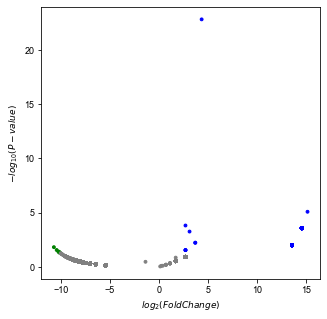

In [49]:
#change plot color
visuz.GeneExpression.volcano(df=merge_b_nb_0,lfc='log2_fc',pv='p_value_X2',ar=0,color=('blue','grey','green'),show=True)

In [ ]:
# https://github.com/vappiah/bioinfoscripts/blob/main/volcano-plot-in-python.py
from bioinfokit import analys, visuz
#plot and save. Plot will be saved in the current working directory
visuz.GeneExpression.volcano(df=merge_b_nb_0,lfc='log2_fc',pv='p_value_X2')

#plot and open . This will not save the image
visuz.GeneExpression.volcano(df=merge_b_nb_0,lfc='log2_fc',pv='p_value_X2',show=True)

#plot and rotate x-axis labels
visuz.GeneExpression.volcano(df=merge_b_nb_0,lfc='log2_fc',pv='p_value_X2',ar=0,show=True)

#show statistically significant differentially expressed genes based on thresholds
visuz.GeneExpression.volcano(df=merge_b_nb_0,lfc='log2_fc',pv='p_value_X2',ar=0,show=True,plotlegend=True,
                        legendpos='upper right',lfc_thr=(1,2),pv_thr=(0.05,0.01))

#change plot color
visuz.GeneExpression.volcano(df=merge_b_nb_0,lfc='log2_fc',pv='p_value_X2',ar=0,color=('blue','grey','green'),show=True)


#Add gene labels
# visuz.GeneExpression.volcano(df=merge_b_nb_0,lfc="log2_fc",pv="p_value_X2",geneid="GeneNames"
#                         ,genenames=("LOC_Os09g01000.1", "LOC_Os01g50030.1", 
#                                     "LOC_Os06g40940.3"),ar=0,show=True)
